<a href="https://colab.research.google.com/github/v1docq/ML-projects/blob/master/Movie_Lens_100K.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Task 1: Exploratory analysis (5 points).

Perform EDA:
- number of users
- number of items
- number of tags
- number of ratings
- summary statistics of number of ratings per user (mean, median, quantiles)
- rating sparcity
- summary statistics of number of tags per use

### Загружаем датасеты

In [0]:
column_movies = ['movie_id', 'title', 'genres']
movies = pd.read_csv(r'C:\Users\Илья\Desktop\ml-latest-small\ml-latest-small\movies.csv', engine = 'python', delimiter = ',', names = column_movies,
                     header = 0)
movies.head()


,movie_id,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
column_ratings = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv(r'C:\Users\Илья\Desktop\ml-latest-small\ml-latest-small\ratings.csv', engine = 'python', delimiter = ',', names= column_ratings
                      , header = 0)
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [0]:
column_users = ['user_id', 'movie_id', 'tag', 'timestamp']
users = pd.read_csv(r'C:\Users\Илья\Desktop\ml-latest-small\ml-latest-small\tags.csv', engine = 'python', delimiter = ',', names= column_users
                    , header = 0)
users.head(5)

,user_id,movie_id,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


### Проверяем на наличие пропущенных значений

In [0]:
print ("Number of movies Null values: ", movies.isnull().sum())
print ("Number of ratings Null values: ", ratings.isnull().sum())


Number of movies Null values:  movie_id    0
title       0
genres      0
dtype: int64
Number of ratings Null values:  user_id      0
movie_id     0
rating       0
timestamp    0
dtype: int64


In [0]:
movies.dropna(inplace=True)
print ("Number of movies Null values: ", movies.isnull().sum())

Number of movies Null values:  movie_id    0
title       0
genres      0
year        0
dtype: int64


In [0]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9742 entries, 0 to 9741
Data columns (total 3 columns):
movie_id    9742 non-null int64
title       9742 non-null object
genres      9742 non-null object
dtypes: int64(1), object(2)
memory usage: 304.4+ KB


In [0]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
user_id      100836 non-null int64
movie_id     100836 non-null int64
rating       100836 non-null float64
timestamp    100836 non-null int64
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [0]:
movies['year'] = movies.title.str.extract("\((\d{4})\)", expand=True)
movies.head()

,movie_id,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [0]:
year_asint = movies['year'].astype(int)

In [0]:
movies.drop(['year'], inplace = True, axis = 1)
movies['year'] = year_asint
movies.head()

,movie_id,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [0]:
date = pd.to_datetime(ratings['timestamp']).astype(str)
ratings['date'] = date
ratings.head()

,user_id,movie_id,rating,timestamp,date
0,1,1,4.0,964982703,1970-01-01 00:00:00.964982703
1,1,3,4.0,964981247,1970-01-01 00:00:00.964981247
2,1,6,4.0,964982224,1970-01-01 00:00:00.964982224
3,1,47,5.0,964983815,1970-01-01 00:00:00.964983815
4,1,50,5.0,964982931,1970-01-01 00:00:00.964982931


In [0]:
ratings['date'] = [time[:10] for time in ratings['date']]
ratings.drop(['timestamp'], inplace = True, axis = 1)
ratings.head()

,user_id,movie_id,rating,date
0,1,1,4.0,1970-01-01
1,1,3,4.0,1970-01-01
2,1,6,4.0,1970-01-01
3,1,47,5.0,1970-01-01
4,1,50,5.0,1970-01-01


In [0]:
movies.describe()

,movie_id,year
count,9729.00000,9729.000000
mean,42054.09004,1994.613629
std,52026.56424,18.535219
min,1.00000,1902.000000
25%,3244.00000,1988.000000
50%,7282.00000,1999.000000
75%,76030.00000,2008.000000
max,193609.00000,2018.000000


In [0]:
ratings.describe()

,user_id,movie_id,rating
count,100836.000000,100836.000000,100836.000000
mean,326.127564,19435.295718,3.501557
std,182.618491,35530.987199,1.042529
min,1.000000,1.000000,0.500000
25%,177.000000,1199.000000,3.000000
50%,325.000000,2991.000000,3.500000
75%,477.000000,8122.000000,4.000000
max,610.000000,193609.000000,5.000000


In [0]:
df = pd.merge(movies,ratings,on='movie_id')
df.head()

,movie_id,title,genres,year,user_id,rating,date
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,1,4.0,1970-01-01
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,5,4.0,1970-01-01
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,7,4.5,1970-01-01
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,15,2.5,1970-01-01
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,17,4.5,1970-01-01


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100818 entries, 0 to 100817
Data columns (total 7 columns):
movie_id    100818 non-null int64
title       100818 non-null object
genres      100818 non-null object
year        100818 non-null int32
user_id     100818 non-null int64
rating      100818 non-null float64
date        100818 non-null object
dtypes: float64(1), int32(1), int64(2), object(3)
memory usage: 5.8+ MB


### Создаем саб-сеты для визуализации

In [0]:
df[df['rating'] >= 4.5]['movie_id'].count() # Фильмы с рейтингом 4,5 или выше

21755

In [0]:
df[df['rating'] >= 4.5]['movie_id'].count() / ratings['rating'].count() # Процент фильмов с рейтингом 4,5 или выше

0.21574636042683168

In [0]:
df[df['rating'] == 5]['movie_id'].count() # Фильмы с рейтингом 5

13206

In [0]:
df[df['rating'] == 5]['movie_id'].count() / ratings['rating'].count() # Процент фильмов с рейтингом 5

0.13096513150065453

In [0]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head() # Топ фильмов по рейтингу

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [0]:
# количество оценок 
df_RateCount = pd.DataFrame(df.groupby('title', as_index = False)['rating'].count()
                              .rename(columns={'rating' : 'RateCount'}))
df_RateCount.sort_values('RateCount',ascending=False).head(5)

,title,RateCount
3154,Forrest Gump (1994),329
7582,"Shawshank Redemption, The (1994)",317
6855,Pulp Fiction (1994),307
7669,"Silence of the Lambs, The (1991)",279
5505,"Matrix, The (1999)",278


In [0]:
# средняя оценка фильма
df_RateMean = pd.DataFrame(df.groupby('title', as_index = False)['rating'].mean()
                              .rename(columns={'rating' : 'RateMean'}))
df_RateMean.sort_values('RateMean',ascending=False).head(5)

,title,RateMean
7381,Saving Santa (2013),5.0
5433,Maniac Cop 2 (1990),5.0
9557,Wonder Woman (2009),5.0
4512,Jane Eyre (1944),5.0
3262,Front of the Class (2008),5.0


In [0]:
# мержим саб-сеты
df_movie_rate = pd.merge(df_RateCount,df_RateMean, on='title')
df_movie_rate.sort_values('RateCount',ascending=False).head(5)

,title,RateCount,RateMean
3154,Forrest Gump (1994),329,4.164134
7582,"Shawshank Redemption, The (1994)",317,4.429022
6855,Pulp Fiction (1994),307,4.197068
7669,"Silence of the Lambs, The (1991)",279,4.161290
5505,"Matrix, The (1999)",278,4.192446


In [0]:
# распределение оценок по пользователям
df_distrib_of_ratings= pd.DataFrame(ratings.groupby('rating', as_index = False)['user_id'].count()
                         .rename(columns={'user_id' : 'RateCount'}))
df_distrib_of_ratings.head(10)

,rating,RateCount
0,0.5,1370
1,1.0,2811
2,1.5,1791
3,2.0,7551
4,2.5,5550
5,3.0,20047
6,3.5,13136
7,4.0,26818
8,4.5,8551
9,5.0,13211


In [0]:
# the users with most ratings
users_rate = ratings[['user_id', 'movie_id']].groupby('user_id').count()
users_rate = users_rate.rename(columns={'movie_id' : 'Total'})
users_rate.sort_values('Total',ascending=False).head()

,Total
user_id,
414,2698
599,2478
474,2108
448,1864
274,1346


In [0]:
# наиболее популярные жанры
MP_genre = df.groupby('genres', as_index = False)['user_id'].count()
MP_genre = MP_genre.rename(columns={'user_id' : 'Total ratings'})
MP_genre.sort_values('Total ratings',ascending=False).head(10)

,genres,Total ratings
634,Comedy,7196
812,Drama,6290
732,Comedy|Romance,3967
687,Comedy|Drama|Romance,3000
670,Comedy|Drama,2851
868,Drama|Romance,2838
127,Action|Adventure|Sci-Fi,2361
747,Crime|Drama,2315
260,Action|Crime|Thriller,1554
133,Action|Adventure|Thriller,1455


In [0]:
# распределение фильмов по жанрам
genres_of_movies = movies.groupby('genres', as_index = False)['movie_id'].count()
genres_of_movies = genres_of_movies.rename(columns={'movie_id' : 'Total ratings'})
genres_of_movies.sort_values('Total ratings',ascending=False).head(10)

,genres,Total ratings
812,Drama,1053
634,Comedy,946
670,Comedy|Drama,435
732,Comedy|Romance,363
868,Drama|Romance,349
799,Documentary,339
687,Comedy|Drama|Romance,276
881,Drama|Thriller,168
910,Horror,167
922,Horror|Thriller,135


### Визуализация

In [0]:
plt.style.use('ggplot')

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

#### Распределение оценок для количества фильмов (минимальное значение 50)

Text(0,0.5,'Количество фильмов')

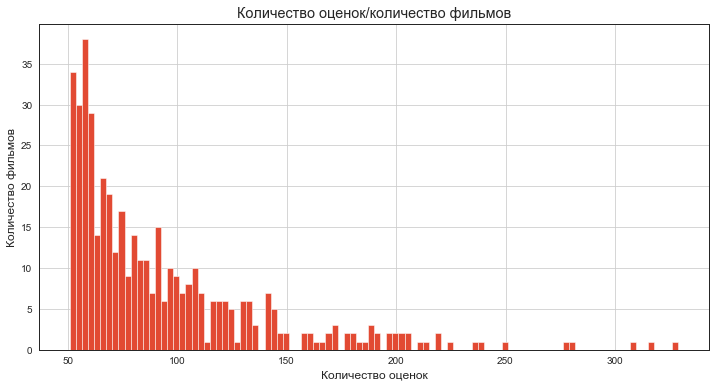

In [0]:
plt.figure(figsize=(12,6))
df_movie_rate[df_movie_rate['RateCount'] > 50]['RateCount'].hist(bins=100)
plt.title('Количество оценок/количество фильмов')
plt.xlabel('Количество оценок')
plt.ylabel('Количество фильмов')

#### Количество фильмов по годам начиная с 1960

Text(0,0.5,'Количество фильмов')

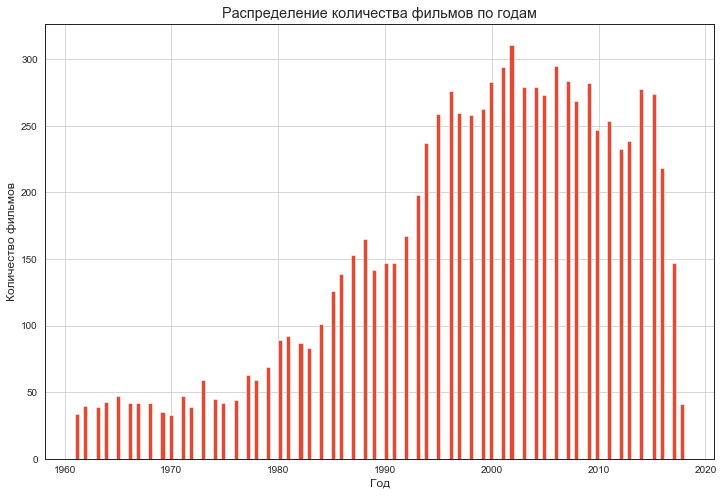

In [0]:
plt.figure(figsize=(12,8))
movies[movies['year'] > 1960]['year'].hist(bins=150)
plt.title('Распределение количества фильмов по годам')
plt.xlabel('Год')
plt.ylabel('Количество фильмов')

#### Распределение шкалы оценок

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


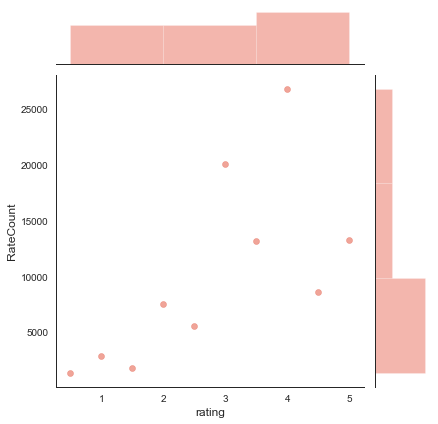

In [0]:
sns.jointplot(x='rating',y='RateCount',data=df_distrib_of_ratings,alpha=0.5)

#### Зависимость количества оценок от средней оценки

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


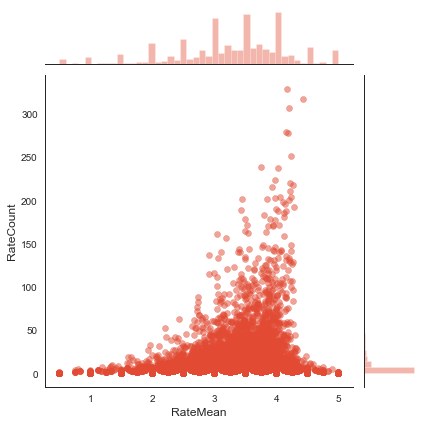

In [0]:
sns.jointplot(x='RateMean',y='RateCount',data= df_movie_rate,alpha=0.5)

#### Количество оценок пользователей

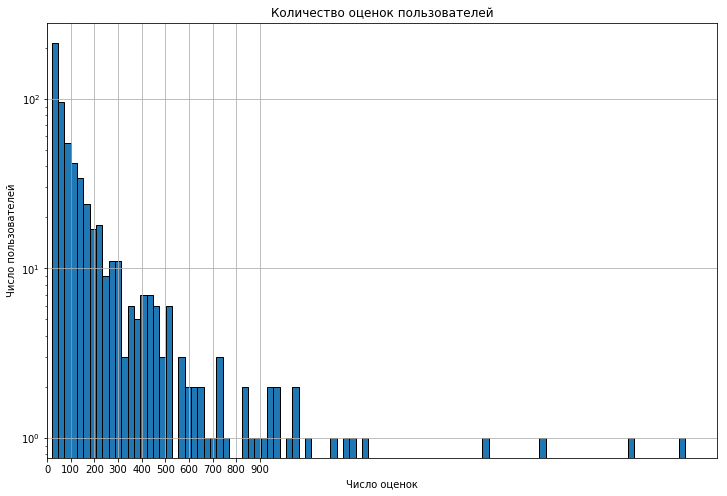

In [0]:
plt.figure(figsize=(12,8))
users_rate['Total'].hist(bins=100, edgecolor='black', log=True)
plt.title('Количество оценок пользователей')
plt.xlabel('Число оценок')
plt.ylabel('Число пользователей')
plt.xlim(0,)
plt.xticks(np.arange(0,1000,100))
plt.show()

Выводы:
1. Большая часть фильмов имеет менее 4000 оценок
2. Пик развиия киноиндустрии пришелся на начало 90-х
3. Большая часть оценок равна или больше 3
4. Большое число оценок завышает рейтинг фильма
5. Большая часть пользователей имеет диапозон от 0 до 200  оценок

### Metrics

Task 2: Evaluation metrics report (5 points)

Implement evaluation metrics to assess recommender performance
- MAP score
- Precision@k
- Mean percentage ranking

In [0]:
class Metric(object):
    def __call__(self, true_values, pred_values, gids=None):
        if gids is None:
            gids = np.zeros(len(true_values))
        raise NotImplementedError()


def _precision(true_relevance):
    return true_relevance.sum() / len(true_relevance)


def average_precision_at_k(k, true_values, pred_values):
    true_values_top = _get_true_values_top(k, true_values, pred_values)
    return np.sum([
        true_values_top[:(ind + 1)].sum() * 1. / (ind + 1)
        for ind in range(len(true_values_top))
        if true_values_top[ind] > 0
    ]) / len(true_values_top)


def _get_true_values_top(k, true_values, pred_values):
    true_values_top = true_values[np.argsort(pred_values)[:-k - 1:-1]]
    return true_values_top


def precision_at_k(k, true_values, pred_values):
    return _get_true_values_top(k, true_values, pred_values).sum() * 1. / k


def PR(k, true_values, pred_values):
    for ind, true_values in enumerate(_get_true_values_top(k, true_values, pred_values)):
        if true_values > 0:
            return 1.0 / (ind + 1)
    return 0.


class MeanMetric(Metric):
    def _group_metric(self, true_values, pred_values):
        raise NotImplementedError()

    def __call__(self, true_values, pred_values, gids=None):
        return pd.DataFrame({
            "true_values": true_values,
            "pred_values": pred_values,
            "gid": gids
        }).groupby("gid").apply(lambda df: self._group_metric(df.true_values.values, df.pred_values.values)).mean()


class MeanPrecision(MeanMetric):
    def __init__(self, k=10):
        self.k = k

    def _group_metric(self, true_values, pred_values):
        return precision_at_k(self.k, true_values, pred_values)

    def __str__(self):
        return "mean_precision@{}".format(self.k)


class MeanAveragePrecision(MeanMetric):
    def __init__(self, k=10):
        self.k = k

    def _group_metric(self, true_values, pred_values):
        return average_precision_at_k(self.k, true_values, pred_values)

    def __str__(self):
        return "mean_average_precision@{}".format(self.k)
    
class MPR(MeanMetric):
    def __init__(self, k=10):
        self.k = k

    def _group_metric(self, true_values, pred_values):
        return PR(self.k, true_values, pred_values)

    def __str__(self):
        return "mean_percintale_rank@{}".format(self.k)


In [0]:
y = np.array([3, 1, 0, 1, 0, 10, 1, 0, 0])
y_pred = np.array([0.1, 0.5, 0.1, 0, 1, 0.1, 1, 10, 1])
gids = np.array([1, 1, 1, 2, 2, 3, 3, 3, 3])

In [0]:
ltr_metrics = [MeanPrecision(),
               MeanPrecision(3),
               MeanPrecision(1),
               MeanAveragePrecision(),
               MeanAveragePrecision(3),
               MeanAveragePrecision(1),
               MPR(),
               MPR(3),
               MPR(1)
               ]

In [0]:
 for metric in ltr_metrics:
     print(metric, metric(y, y_pred, gids))

mean_precision@10 0.5333333333333333
mean_precision@3 0.6666666666666666
mean_precision@1 0.3333333333333333
mean_average_precision@10 0.5995370370370371
mean_average_precision@3 0.3796296296296296
mean_average_precision@1 0.3333333333333333
mean_percintale_rank@10 0.611111111111111
mean_percintale_rank@3 0.611111111111111
mean_percintale_rank@1 0.3333333333333333


## Collaborative filtering based recommenders 

#### Most popular items (MP) recommender

Сделаем систему которая будет предлагать топ-х фильмов, похожих на фильм который предложил пользователя. Так же сделаем отсев по минимальному числу оценок

In [0]:
MP_movie = df.pivot_table(index='user_id',columns='title',values='rating')
MP_movie.head(5)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]ВІ (2009),[REC]Ві 3 GГ©nesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),ВЎThree Amigos! (1986),ГЂ nous la libertГ© (Freedom for Us) (1931)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
def MP_recomenders(movie_name, movie_df, rating_and_title_df,number_of_ratings, top_similar):
    
    MP_user_ratings = movie_df[movie_name]
    similar_to_MP = MP_movie.corrwith(MP_user_ratings)
    MP_recomender = pd.DataFrame(similar_to_MP,columns=['Correlation'])
    MP_recomender.dropna(inplace=True)
    ratings = pd.DataFrame(rating_and_title_df.groupby('title')['rating'].mean())
    ratings['num of ratings'] = pd.DataFrame(rating_and_title_df.groupby('title')['rating'].count())
    MP_recomender = MP_recomender.join(ratings['num of ratings'])
    sorted_MP = MP_recomender[(MP_recomender['num of ratings']>50)&(MP_recomender['num of ratings']<number_of_ratings)].sort_values('Correlation',ascending=False).head(top_similar)
    
    return sorted_MP

In [0]:
user_film = '(500) Days of Summer (2009)'

In [0]:
MP_recomenders(user_film,MP_movie,df,200, 5)

D:\anaconda\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
D:\anaconda\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation,num of ratings
title,,
Star Trek II: The Wrath of Khan (1982),0.981991,62
"Piano, The (1993)",0.944911,61
Desperado (1995),0.891042,66
Dances with Wolves (1990),0.879955,164
"Crow, The (1994)",0.857493,64


### Matrix factorization

#### Collaborative filtering using sklearn SVD

In [0]:
R_df = ratings.pivot(index = 'user_id', columns ='movie_id', values = 'rating').fillna(0)
R_df.head()

movie_id,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
user_id,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
R = R_df.as_matrix()

Z = R>0
m, n = R.shape
Ymean = np.zeros(m)
Ynorm = np.zeros(R.shape)

for i in range(m):
    idx = Z[i, :] == 1
    Ymean[i] = np.mean(R[i, idx])
    Ynorm[i, idx] = R[i, idx] - Ymean[i]    

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [0]:
R_demeaned = R - Ymean[:,np.newaxis]

In [0]:
from scipy.sparse.linalg import svds
K = 10
U, sigma, Vt = svds(R_demeaned, k = 10)

In [0]:
column_movies = ['movie_id', 'title', 'genres']
movies = pd.read_csv(r'C:\Users\Илья\Desktop\ml-latest-small\ml-latest-small\movies.csv', engine = 'python', delimiter = ',', names = column_movies,
                     header = 0)
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
sigma = np.diag(sigma)

In [0]:
pd.DataFrame(np.dot(np.dot(U, sigma), Vt)).head()

,0,1,2,3,4,5,6,7,8,9,...,9714,9715,9716,9717,9718,9719,9720,9721,9722,9723
0,-1.518367,-3.453123,-3.416975,-4.398655,-4.155210,-2.694267,-4.172392,-4.378190,-4.185228,-2.353858,...,-4.385732,-4.384681,-4.386783,-4.386783,-4.385732,-4.386783,-4.385732,-4.385732,-4.385732,-4.402181
1,-3.513796,-4.051175,-3.917915,-3.953420,-3.863439,-3.980198,-3.868783,-3.926645,-3.865414,-4.027184,...,-3.929739,-3.932176,-3.927303,-3.927303,-3.929739,-3.927303,-3.929739,-3.929739,-3.929739,-3.932312
2,-2.128695,-2.490092,-2.338354,-2.436129,-2.378523,-2.451450,-2.352165,-2.415745,-2.344068,-2.380065,...,-2.417738,-2.418958,-2.416519,-2.416519,-2.417738,-2.416519,-2.417738,-2.417738,-2.417738,-2.424740
3,-1.914691,-3.344993,-3.191223,-3.518725,-3.308834,-3.331828,-3.210956,-3.596535,-3.556721,-3.524609,...,-3.569183,-3.569433,-3.568932,-3.568932,-3.569183,-3.568932,-3.569183,-3.569183,-3.569183,-3.576138
4,-2.317730,-2.668194,-3.194695,-3.517354,-3.080919,-2.906204,-2.973126,-3.517717,-3.503757,-2.481201,...,-3.637479,-3.638044,-3.636914,-3.636914,-3.637479,-3.636914,-3.637479,-3.637479,-3.637479,-3.640545


In [0]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 

In [0]:
Ymean[:,np.newaxis].shape

(610, 1)

In [0]:
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = R_df.columns)
print(preds_df.shape)

(610, 9724)


In [0]:
def recommend_movies(predictions_df, userID, movies_df, original_ratings_df, num_recommendations=5):

    user_row_number = userID -1
    sorted_user_predictions = predictions_df.iloc[user_row_number].sort_values(ascending=False)

    user_data = original_ratings_df[original_ratings_df.user_id == userID]
    user_full = (user_data.merge(movies_df, how = 'left', left_on = 'movie_id', right_on = 'movie_id').
                     sort_values(['rating'], ascending=False))

    print ('Пользователь с id  №{0} на данный момент оценил {1} фильмов.'.format(userID, user_full.shape[0]))
    print ('Предложнено топ-{0} фильмов ждущих оценки.'.format(num_recommendations))
    
    recommendations = (movies_df[~movies_df['movie_id'].isin(user_full['movie_id'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
               left_on = 'movie_id',
               right_on = 'movie_id').
         rename(columns = {user_row_number: 'Predictions'}).
         sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations, :-1]
                      )

    return user_full, recommendations

In [0]:
already_rated, predictions = recommend_movies(preds_df, 47, movies, ratings, 10)

Пользователь с id  №47 на данный момент оценил 140 фильмов.
Предложнено топ-10 фильмов ждущих оценки.


In [0]:
already_rated.head(10)

,user_id,movie_id,rating,timestamp,title,genres
123,47,112804,5.0,1496205128,I Origins (2014),Drama|Sci-Fi
79,47,47423,5.0,1496205761,Half Nelson (2006),Drama
40,47,3147,5.0,1496205029,"Green Mile, The (1999)",Crime|Drama
121,47,112552,5.0,1496205226,Whiplash (2014),Drama
84,47,51931,5.0,1496205747,Reign Over Me (2007),Drama
8,47,391,4.5,1496206564,Jason's Lyric (1994),Crime|Drama
75,47,33166,4.5,1496206497,Crash (2004),Crime|Drama
102,47,84152,4.5,1496208763,Limitless (2011),Sci-Fi|Thriller
7,47,356,4.5,1496206696,Forrest Gump (1994),Comedy|Drama|Romance|War
89,47,63082,4.0,1496205289,Slumdog Millionaire (2008),Crime|Drama|Romance


In [0]:
predictions

,movie_id,title,genres
251,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
450,527,Schindler's List (1993),Drama|War
1259,1704,Good Will Hunting (1997),Drama|Romance
7275,79132,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX
44,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
2108,2858,American Beauty (1999),Drama|Romance
1905,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller
6622,58559,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX
3587,4995,"Beautiful Mind, A (2001)",Drama|Romance
94,110,Braveheart (1995),Action|Drama|War


### Посчитаем метрики

In [0]:
# количество оценок 
df_RateCount = pd.DataFrame(df.groupby('movie_id', as_index = False)['rating'].count()
                              .rename(columns={'rating' : 'RateCount'}))
df_RateCount.sort_values('RateCount',ascending=False).head(5)

,movie_id,RateCount
314,356,329
277,318,317
257,296,307
510,593,279
1938,2571,278


In [0]:
df_RateMean = pd.DataFrame(df.groupby('movie_id', as_index = False)['rating'].mean()
                              .rename(columns={'rating' : 'RateMean'}))
df_RateMean.sort_values('RateMean',ascending=False).head(5)

,movie_id,RateMean
7617,87834,5.0
8917,136359,5.0
2232,2969,5.0
8854,134004,5.0
4759,7096,5.0


In [0]:
df_movie_rate = pd.merge(df_RateCount,df_RateMean, on='movie_id')
df_movie_rate = df_movie_rate.sort_values('RateCount',ascending=False)
df_movie_rate.head(10)

,movie_id,RateCount,RateMean
314,356,329,4.164134
277,318,317,4.429022
257,296,307,4.197068
510,593,279,4.161290
1938,2571,278,4.192446
224,260,251,4.231076
418,480,238,3.750000
97,110,237,4.031646
507,589,224,3.970982
461,527,220,4.225000


In [0]:
y = df_movie_rate['movie_id'].iloc[:10].values
y_pred = predictions['movie_id'].values
gids = np.zeros(len(y))

In [0]:
ltr_metrics = [MeanPrecision(),
               MeanPrecision(3),
               MeanPrecision(1),
               MeanAveragePrecision(),
               MeanAveragePrecision(3),
               MeanAveragePrecision(1),
               MPR(),
               MPR(3),
               MPR(1)
               ]

In [0]:
for metric in ltr_metrics:
    print(metric, metric(y, y_pred, gids))

mean_precision@10 610.0
mean_precision@3 430.6666666666667
mean_precision@1 593.0
mean_average_precision@10 431.2927777777778
mean_average_precision@3 458.3888888888889
mean_average_precision@1 593.0
mean_percintale_rank@10 1.0
mean_percintale_rank@3 1.0
mean_percintale_rank@1 1.0


#### Collaborative filtering using sklearn surprise lib

In [0]:
#!pip install scikit-surprise
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNBaseline
from surprise import SVD
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import CoClustering
from surprise.accuracy import rmse
from surprise import accuracy
from surprise.model_selection import train_test_split

In [0]:
movies_cols = ['movie_id', 'title', 'genres']
movies = pd.read_csv(r'C:\Users\Илья\Desktop\ml-latest-small\ml-latest-small\movies.csv', 
                     engine = 'python',names=movies_cols, sep=',',header=None, skiprows=[0,], encoding='latin-1')
movies.drop([0], inplace=True)
movies.drop('genres', axis = 1, inplace = True)
movies.head()

,movie_id,title
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
5,6,Heat (1995)


In [0]:
df_ML = ratings.merge(movies, on='movie_id')
df_ML.rating = df_ML.rating.astype(float)
df_ML.user_id = df_ML.user_id.astype(int)
df_ML.movie_id = df_ML.movie_id.astype(int)

In [0]:
df_ML.head()

,user_id,movie_id,rating,date,title
0,1,3,4.0,1970-01-01,Grumpier Old Men (1995)
1,6,3,5.0,1970-01-01,Grumpier Old Men (1995)
2,19,3,3.0,1970-01-01,Grumpier Old Men (1995)
3,32,3,3.0,1970-01-01,Grumpier Old Men (1995)
4,42,3,4.0,1970-01-01,Grumpier Old Men (1995)


In [0]:
min_item_clicks = 25
filter_items = df_ML['movie_id'].value_counts() > min_item_clicks
filter_items = filter_items[filter_items].index.tolist()

min_user_clicks = 25
filter_users = df_ML['user_id'].value_counts() > min_user_clicks
filter_users = filter_users[filter_users].index.tolist()

df_filtered = df_ML[(df_ML['movie_id'].isin(filter_items)) & (df_ML['user_id'].isin(filter_users))]
print('Размер оригинального сета:\t{}'.format(df.shape))
print('Размер очищенного сета:\t{}'.format(df_filtered.shape))

Размер оригинального сета:	(100818, 7)
Размер очищенного сета:	(60115, 5)


In [0]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_filtered[['user_id', 'movie_id', 'rating']], reader)

In [0]:
benchmark = []

for algo in [SVD(),SVDpp(), KNNBaseline(), KNNBasic(), BaselineOnly(), NormalPredictor(), CoClustering()]:

    print('Начало кросс-валидации для {}'.format(algo))
    results = cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=False)
    
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algo).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)

Начало кросс-валидации для <surprise.prediction_algorithms.matrix_factorization.SVD object at 0x000001E33162E3C8>
Начало кросс-валидации для <surprise.prediction_algorithms.matrix_factorization.SVDpp object at 0x000001E33162E358>
Начало кросс-валидации для <surprise.prediction_algorithms.knns.KNNBaseline object at 0x000001E33162E320>
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Начало кросс-валидации для <surprise.prediction_algorithms.knns.KNNBasic object at 0x000001E33162E2E8>
Computing the msd similarity matrix...
Do

In [0]:
surprise_results = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')
surprise_results

,test_rmse,fit_time,test_time
Algorithm,,,
SVDpp,0.826538,117.260212,2.284955
KNNBaseline,0.831032,0.239671,1.577111
SVD,0.839528,2.879407,0.100670
BaselineOnly,0.841158,0.095872,0.063113
CoClustering,0.881809,1.112122,0.080681
KNNBasic,0.890763,0.159790,1.120898
NormalPredictor,1.356649,0.067900,0.091090


In [0]:
benchmark = []

methods = 'als'
n_epochs = [10,15,20,40]
reg_us = [2, 5 ,10]
reg_is = [2, 5, 10]

for n_epoch in n_epochs:
  for reg_u in reg_us:
    for reg_i in reg_is:
      bsl_options = {'method': 'als',
                     'n_epochs': n_epoch,
                     'reg_u': reg_u,
                     'reg_i': reg_i}

      algo = BaselineOnly(bsl_options=bsl_options)
      results = cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=False)

      tmp = pd.DataFrame.from_dict(results).mean(axis=0)
      tmp = tmp.append(pd.Series([str(algo).split(' ')[0].split('.')[-1]], index=['Algorithm']))
      tmp['n_epochs'] = n_epoch
      tmp['reg_u'] = reg_u
      tmp['reg_i'] = reg_i
      benchmark.append(tmp)


Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimati

In [0]:
surprise_results = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')
surprise_results

,test_rmse,fit_time,test_time,n_epochs,reg_u,reg_i
Algorithm,,,,,,
BaselineOnly,0.838056,0.257259,0.063107,40,5,5
BaselineOnly,0.838681,0.230902,0.054336,40,2,2
BaselineOnly,0.838880,0.107062,0.052718,15,5,5
BaselineOnly,0.838886,0.079889,0.065501,10,2,5
BaselineOnly,0.838947,0.131823,0.051934,20,2,5
BaselineOnly,0.838975,0.119058,0.064706,15,5,2
BaselineOnly,0.838989,0.110268,0.054327,15,2,5
BaselineOnly,0.839027,0.258044,0.066302,40,5,2
BaselineOnly,0.839054,0.230898,0.055109,40,2,5


In [0]:
trainset, testset = train_test_split(data, test_size=0.25)
bsl_options = {'method': 'als',
               'n_epochs': 40,
               'reg_u': 5,
               'reg_i': 5}

algo = BaselineOnly(bsl_options=bsl_options)
predictions = algo.fit(trainset).test(testset)
accuracy.rmse(predictions)

Estimating biases using als...
RMSE: 0.8397


0.8397395248689495

### Bonus task

Implement a class to return a given number of recommendations for a given user
- get user and item vectors via matrix factorization
- use kd-tree from sklearn.neighbors to implement nearest neighbor search of recommender items for a given user vector
- run performance test to compare the speed of kd-tree implementation versus naive brute force search
(e.g. query top-10 items for 100 users, repeat simulations several times and plot query execution time summary statistics)

In [0]:
class Matrix_Recomender(object):
    def __init__(self):
        pass
        

    def get_Iu(uid):
        """ число фильмов рекомендованных пользователем
          uid: id пользователя
        """
        try:
            return len(trainset.ur[trainset.to_inner_uid(uid)])
        except ValueError: 
            return 0
    
    def get_Ui(iid):
        """ число пользователей которые оценили конкретный фильм
          iid: id фильма
        """
        try: 
            return len(trainset.ir[trainset.to_inner_iid(iid)])
        except ValueError:
            return 0

    def SVD_recomender(df_with_matrix_predictions, movie_df,top_predictions, chosen_user):

        new_matrix_df = pd.DataFrame(df_with_matrix_predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
        new_matrix_df['Iu'] = new_matrix_df.uid.apply(get_Iu)
        new_matrix_df['Ui'] = new_matrix_df.iid.apply(get_Ui)
        new_matrix_df['err'] = abs(new_matrix_df.est - new_matrix_df.rui)
    
        df_to_merge =  movie_df
        df_to_merge =  df_filtered[['movie_id','title','user_id','rating']]
        df_to_merge.rename(columns={'movie_id': 'iid'}, inplace=True)
        new_matrix_df = new_matrix_df.merge(df_to_merge, on='iid', how='left' )
        new_matrix_df = new_matrix_df.sort_values(by='err')
    
        print ('Количество пользователей для которых есть рекоменадции-{0}'.format(len(new_matrix_df['uid'].unique())))
        print ('ID выбранного пользователя-{0}'.format(chosen_user))
        print ('Топ {0} фильмов для выбранного пользователя'.format(top_predictions))
    
        return new_matrix_df[new_matrix_df['uid'] == chosen_user]['title'].unique()[:top_predictions]
    
    def residual_analysis():
            
        df_residuals_1 = new_matrix_df.loc[:,('title', 'err')].groupby('title').mean().sort_values(by = 'err')
        df_residuals_2 = new_matrix_df['title'].value_counts()
        df_residuals_3 = df_residuals_1.join(df_residuals_2, on = 'title',  how='left', lsuffix='_caller')
        df_residuals_3.rename(columns={'err': 'error_rate', 'title': 'number_of_ratings'}, inplace=True)

        return sns.scatterplot(data = df_residuals_3, x ='error_rate' , y = 'number_of_ratings', alpha= 0.6)
            


In [0]:
Matrix_Recomender.SVD_recomender(predictions, movies,3,33)

D:\anaconda\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


Количество пользователей для которых есть рекоменадции-538
ID выбранного пользователя-33
Топ 3 фильмов для выбранного пользователя


array(['Adventures of Priscilla, Queen of the Desert, The (1994)',
       'Lock, Stock & Two Smoking Barrels (1998)',
       'Shakespeare in Love (1998)'], dtype=object)

#### Проверка на гетероскедаксичность остатков

In [0]:
df.corr().sort_values(by = 'err').loc[:,'err']

rui       -0.330209
est       -0.177742
Iu        -0.063353
Ui        -0.040428
uid       -0.038140
rating    -0.033947
iid       -0.009013
user_id    0.001768
err        1.000000
Name: err, dtype: float64

остатки линейно не коррелированы с остальными переменными

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FA86097518>]],
      dtype=object)

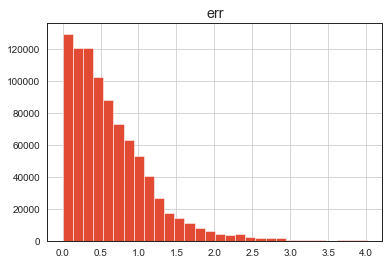

In [0]:
df.hist('err', bins = 30)

In [0]:
# next steps:
# merge with movie title
# try to understand most predictive movies
# try to understand number on rating per movie as a threshhold
# bulid mini recommandation system

### Tenzor factorization

In [0]:
import tensorly as tl
from tensorly.decomposition import parafac

In [0]:

R_users_film = ratings.pivot(index = 'user_id', columns ='movie_id', values = 'rating').fillna(0)
R_users_film.head(5)

movie_id,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
user_id,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
R1 = R_users_film.as_matrix()

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [0]:
x=np.array( [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])

In [0]:
R1 = tl.tensor(R1.reshape((610, 9724,1)))
print(R1.shape)

(610, 9724, 1)


In [0]:
x = tl.tensor(x.reshape((10, 1)))
print(x.shape)

(10, 1)


In [0]:
res = tl.tenalg.mode_dot(R1, x, mode=2)

In [0]:
res.shape

(610, 9724, 10)

In [0]:
from tensorly.decomposition import parafac

In [0]:

weights, factors = parafac(res, rank=10)

In [0]:

len(factors)

3

In [0]:

[f.shape for f in factors]

[(610, 10), (9724, 10), (10, 10)]

In [0]:
Ui = factors[0]

In [0]:
Ii = factors[1]

In [0]:
sigma_tens = factors[2]

In [0]:
Ii=Ii.reshape(10,9724)

In [0]:
user_item= np.dot(Ui,Ii)

In [0]:
user_item

array([[-2.27361800e+01,  8.88022896e+00, -1.13964872e+01, ...,
         1.21845072e+00,  3.06927700e+00, -5.07879209e+00],
       [-2.89975748e+00,  1.13257857e+00, -1.45350050e+00, ...,
         1.55400405e-01,  3.91453574e-01, -6.47745811e-01],
       [-4.38049166e-01,  1.71091929e-01, -2.19571701e-01, ...,
         2.34754177e-02,  5.91345701e-02, -9.78511183e-02],
       ...,
       [-4.42176845e+01,  1.72704105e+01, -2.21640696e+01, ...,
         2.36966234e+00,  5.96917873e+00, -9.87731564e+00],
       [-1.74052605e+00,  6.79809443e-01, -8.72436924e-01, ...,
         9.32762330e-02,  2.34962803e-01, -3.88797500e-01],
       [-4.73263235e+01,  1.84845734e+01, -2.37222718e+01, ...,
         2.53625688e+00,  6.38883032e+00, -1.05717213e+01]])

In [0]:
preds_tensor = pd.DataFrame(user_item, columns = R_users_film.columns)
print(preds_tensor.shape)

(610, 9724)


In [0]:
already_rated, predictions = recommend_movies(preds_tensor, 47, movies, ratings, 10)

Пользователь с id  №47 на данный момент оценил 140 фильмов.
Предложнено топ-10 фильмов ждущих оценки.


In [0]:
already_rated.head(10)

,user_id,movie_id,rating,timestamp,title,genres
123,47,112804,5.0,1496205128,I Origins (2014),Drama|Sci-Fi
79,47,47423,5.0,1496205761,Half Nelson (2006),Drama
40,47,3147,5.0,1496205029,"Green Mile, The (1999)",Crime|Drama
121,47,112552,5.0,1496205226,Whiplash (2014),Drama
84,47,51931,5.0,1496205747,Reign Over Me (2007),Drama
8,47,391,4.5,1496206564,Jason's Lyric (1994),Crime|Drama
75,47,33166,4.5,1496206497,Crash (2004),Crime|Drama
102,47,84152,4.5,1496208763,Limitless (2011),Sci-Fi|Thriller
7,47,356,4.5,1496206696,Forrest Gump (1994),Comedy|Drama|Romance|War
89,47,63082,4.0,1496205289,Slumdog Millionaire (2008),Crime|Drama|Romance


### Предсказания на основе тензорной факторизации дают нам более точное представление о жанровых предпочтениях юзера

In [0]:
predictions

,movie_id,title,genres
8868,139655,Goodnight Mommy (Ich seh ich seh) (2014),Drama|Fantasy|Horror|Thriller
2210,2987,Who Framed Roger Rabbit? (1988),Adventure|Animation|Children|Comedy|Crime|Fant...
8994,146244,Dil To Pagal Hai (1997),Comedy|Drama|Romance
8886,140359,Doctor Who: The Waters of Mars (2009),Adventure|Children|Sci-Fi
5022,8016,"Getaway, The (1972)",Action|Crime|Drama|Thriller
8905,141422,Suffragette (2015),Drama
9268,165075,London Town (2016),Drama
9032,148671,Saw (2003),Crime|Horror
4692,7083,Sweet Dreams (1985),Drama
7850,96084,Hands Over the City (Le mani sulla cittГ ) (1963),Drama


In [0]:
# количество оценок 
df_RateCount = pd.DataFrame(df.groupby('movie_id', as_index = False)['rating'].count()
                              .rename(columns={'rating' : 'RateCount'}))
df_RateCount.sort_values('RateCount',ascending=False).head(5)

,movie_id,RateCount
314,356,329
277,318,317
257,296,307
510,593,279
1938,2571,278


In [0]:
df_RateMean = pd.DataFrame(df.groupby('movie_id', as_index = False)['rating'].mean()
                              .rename(columns={'rating' : 'RateMean'}))
df_RateMean.sort_values('RateMean',ascending=False).head(5)

,movie_id,RateMean
7617,87834,5.0
8917,136359,5.0
2232,2969,5.0
8854,134004,5.0
4759,7096,5.0


In [0]:
df_movie_rate = pd.merge(df_RateCount,df_RateMean, on='movie_id')
df_movie_rate = df_movie_rate.sort_values('RateCount',ascending=False)
df_movie_rate.head(10)

,movie_id,RateCount,RateMean
314,356,329,4.164134
277,318,317,4.429022
257,296,307,4.197068
510,593,279,4.161290
1938,2571,278,4.192446
224,260,251,4.231076
418,480,238,3.750000
97,110,237,4.031646
507,589,224,3.970982
461,527,220,4.225000


In [0]:
y = df_movie_rate['movie_id'].iloc[:10].values
y_pred = predictions['movie_id'].values
gids = np.zeros(len(y))

In [0]:
ltr_metrics = [MeanPrecision(),
               MeanPrecision(3),
               MeanPrecision(1),
               MeanAveragePrecision(),
               MeanAveragePrecision(3),
               MeanAveragePrecision(1),
               MPR(),
               MPR(3),
               MPR(1)
               ]

#### Метрики для тензорной факторизации

In [0]:
for metric in ltr_metrics:
    print(metric, metric(y, y_pred, gids))

mean_precision@10 610.0
mean_precision@3 295.3333333333333
mean_precision@1 480.0
mean_average_precision@10 432.9940873015873
mean_average_precision@3 356.77777777777777
mean_average_precision@1 480.0
mean_percintale_rank@10 1.0
mean_percintale_rank@3 1.0
mean_percintale_rank@1 1.0


#### Метрики для SVD факторизации

In [0]:
for metric in ltr_metrics:
    print(metric, metric(y, y_pred, gids))

mean_precision@10 610.0
mean_precision@3 430.6666666666667
mean_precision@1 593.0
mean_average_precision@10 431.2927777777778
mean_average_precision@3 458.3888888888889
mean_average_precision@1 593.0
mean_percintale_rank@10 1.0
mean_percintale_rank@3 1.0
mean_percintale_rank@1 1.0
